# 画像メディア工学１０回目
## 10. 線形変換
### ライブラリの読み込み

In [1]:
#%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2

### 10.1 python (numpy)での行列計算

線形変換では行列計算が必要となるが，行列を表すnumpyのクラス (np.matrix)を使うと，行列演算用の変数が作成できる．

（ただの２次元配列の場合，```A*B```としても行列積の計算とならないことに注意）

例えば，以下の数式を計算する場合，以下の通りで計算できる．
$$　
\boldsymbol{X_2} =
\boldsymbol{A}\boldsymbol{X_1}
$$
$$
\boldsymbol{A} = \begin{pmatrix}
1 & 2 \\
3 & 4 \\
\end{pmatrix},
\boldsymbol{X} =
\begin{pmatrix}
5 \\
6 \\
\end{pmatrix}
$$

In [2]:
A = np.matrix([[1,2],
               [3,4]])
X1 = np.matrix([[5],
               [6]])
X2 = A*X1
print(X2)

[[17]
 [39]]


```A.T```すると，転置行列になる．

In [3]:
print(A)
print(A.T)

[[1 2]
 [3 4]]
[[1 3]
 [2 4]]


np.arrayの場合は，以下のように行列積の計算とはならない．

In [4]:
A = np.array([[1,2],
               [3,4]])
X1 = np.array([[5],
               [6]])
X2 = A*X1
print(X2)

[[ 5 10]
 [18 24]]


### 10.2 線形変換
(5,5), (5,10), (8,5), (8,10)の４点を線形変換する場合を考える．

[[ 5  5  8  8]
 [ 5 10  5 10]]


matrix([[5, 5, 8, 8]])

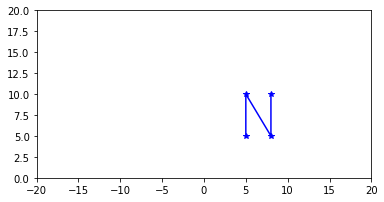

In [5]:
# 変換対象の４点
X1 = np.matrix([[5, 5,8, 8],
                [5,10,5,10]])
print(X1)

# matplotlibで表示
plt.plot(X1[0,:].T,X1[1,:].T,'b*-')
plt.axis('scaled')
plt.xlim([-20,20]);
plt.ylim([0,20]);
X1[0,:]

線形変換の基本形は，
$$
\begin{pmatrix}
x' \\
y' \\
\end{pmatrix}=
\begin{pmatrix}
a & b \\
c & d \\
\end{pmatrix}
\begin{pmatrix}
x \\
y \\
\end{pmatrix}
$$
$$=
\boldsymbol{A}
\begin{pmatrix}
x \\
y \\
\end{pmatrix}
$$

### 拡大縮小
拡大縮小の時の変換行列は，
$
\boldsymbol{A} = \begin{pmatrix}
s_x & 0 \\
0 & s_y \\
\end{pmatrix}
$

[[ 7.5  7.5 12.  12. ]
 [ 7.5 15.   7.5 15. ]]


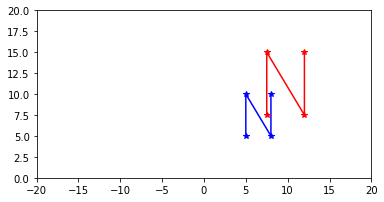

In [6]:
# 変換行列の定義
sx = 1.5
sy = 1.5
A = np.matrix([[sx,0],
               [0,sy]])
                
# ４点の変換
X2 = A*X1
print(X2)

# matplotlibで表示
plt.plot(X1[0,:].T,X1[1,:].T,'b*-')
plt.plot(X2[0,:].T,X2[1,:].T,'r*-')
plt.axis('scaled')
plt.xlim([-20,20]);
plt.ylim([0,20]);

### 回転
回転の時の変換行列は，
$
\boldsymbol{A} = \begin{pmatrix}
\cos\theta & -\sin\theta \\
\sin\theta & \cos\theta \\
\end{pmatrix}
$

[[ 2.41844763  0.30535632  5.13737099  3.02427968]
 [ 6.64463024 11.17616918  7.91248503 12.44402396]]


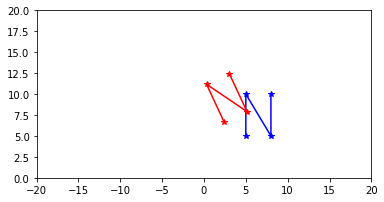

In [7]:
# 変換行列の定義
theta = np.radians(25)
A = np.matrix([[np.cos(theta),-np.sin(theta)],
               [np.sin(theta),np.cos(theta)]])
                
# ４点の変換
X2 = A*X1
print(X2)

# matplotlibで表示
plt.plot(X1[0,:].T,X1[1,:].T,'b*-')
plt.plot(X2[0,:].T,X2[1,:].T,'r*-')
plt.axis('scaled')
plt.xlim([-20,20]);
plt.ylim([0,20]);

その他の変換についても，```A```を定義すれば実行できる．

### 合成変換
鏡映の変換行列を```A```，回転の変換行列を```B```とした場合

X3:
[[ -6.64463024  -8.75772155  -9.3635536  -11.47664491]
 [  2.41844763   6.94998656   1.15059284   5.68213178]]
X3_2:
[[ -6.64463024  -8.75772155  -9.3635536  -11.47664491]
 [  2.41844763   6.94998656   1.15059284   5.68213178]]
X4:
[[-2.41844763 -0.30535632 -5.13737099 -3.02427968]
 [ 6.64463024 11.17616918  7.91248503 12.44402396]]


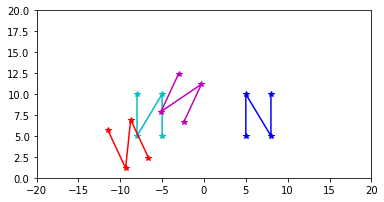

In [8]:
# 鏡映（Y軸）の変換行列の定義
A = np.matrix([[-1,0],
               [0,  1]])

# 回転変換行列の定義
theta = np.radians(25)
B = np.matrix([[np.cos(theta),-np.sin(theta)],
               [np.sin(theta),np.cos(theta)]])

# 合成変換                
C = B*A

# 順番を入れ替えた合成変換                
D = A*B
                
# ４点の変換
X2 = A*X1
X3 = B*X2
print("X3:")
print(X3)

X3_2 = C*X1
print("X3_2:")
print(X3_2)

X4 = D*X1
print("X4:")
print(X4)

# matplotlibで表示
plt.plot(X1[0,:].T,X1[1,:].T,'b*-') # 元の点の場所（青:blue）
plt.plot(X2[0,:].T,X2[1,:].T,'c*-') # 鏡映（水色:cyan）
plt.plot(X3[0,:].T,X3[1,:].T,'r*-') # 鏡映の後に回転（赤:red）
plt.plot(X4[0,:].T,X4[1,:].T,'m*-') # 回転の後に鏡映（紫：magenta）
plt.axis('scaled')
plt.xlim([-20,20]);
plt.ylim([0,20]);

合成変換を表す行列を計算してから変換しても，同じ結果となっていることが確認できる．

### 10.3 画像の線形変換
画像に対して線形変換を行う場合は，以下のような処理となる．

変換前の画像を以下の通りに作成する．
ここでは，それぞれx=20～44，y=5～29の範囲を変換対象の画像部分とする．

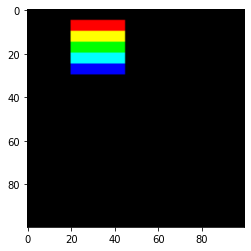

In [9]:
img = np.zeros((100, 100, 3), dtype=np.uint8)

# numpyでは，y軸の＋は下方向であることに注意
img[ 5:10,20:45,0]=255
img[10:15,20:45,0]=255
img[10:15,20:45,1]=255
img[15:20,20:45,1]=255
img[20:25,20:45,1]=255
img[20:25,20:45,2]=255
img[25:30,20:45,2]=255
plt.imshow(img)

### 画像の線形変換

（theta を大きい場合等，変換結果が画像外になる場合には，結果が変になることに注意）

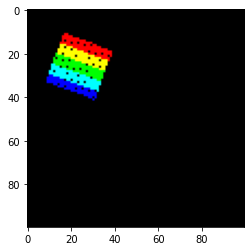

In [10]:
# 変換行列の定義(回転)
theta = np.radians(20)
A = np.matrix([[np.cos(theta),-np.sin(theta)],
               [np.sin(theta),np.cos(theta)]])

# 出力用の画像
out = np.zeros((100, 100, 3), dtype=np.uint8) # 出力用画像

# 変換したい画像の範囲でループ
for y in range(5,29):
    for x in range(20,44):
        X = np.matrix([[x],[y]])
        X2 = A*X # x,yの変換結果の座標
        x2 = X2[0,0]
        y2 = X2[1,0]        
        
        # 変換結果の座標に元画像のピクセルを代入 
        out[int(y2),int(x2)] = img[y,x] 
        
plt.imshow(out)

### 課題
画像の線形変換を行った結果，ところどころに穴が開いてしまっています．

なぜこのような画像になるか，その原因を考えて答えてください．
（10.3のプログラムを理解してもらえればわかるはずです）

ヒント：上の例では回転処理を行っていますが，拡大処理で考えるとわかりやすいと思います（Aを変更したものが以下のコードです）．

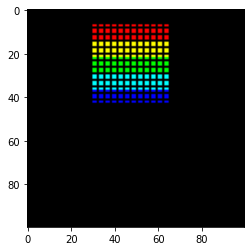

In [11]:
# 変換行列の定義（拡大）
sx = 1.5
sy = 1.5
A = np.matrix([[sx,0],
               [0,sy]])

# 出力用の画像
out = np.zeros((100, 100, 3), dtype=np.uint8) # 出力用画像

# 変換したい画像の範囲でループ
for y in range(5,29):
    for x in range(20,44):
        X = np.matrix([[x],[y]])
        X2 = A*X # x,yの変換結果の座標
        x2 = X2[0,0]
        y2 = X2[1,0]        
        
        # 変換結果の座標に元画像のピクセルを代入 
        out[int(y2),int(x2)] = img[y,x] 
        
plt.imshow(out)